In [1]:
import sgs_preprocess
import sgs_alg
import sgs_plts
import survey_path

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import data and get file information

In [107]:
orig_data = 'Data/Real/Greenland_data.csv'
GT_file = 'Output/Real/Greenland_GT_2.csv'
x = 'X'
y = 'Y'
z = 'Bed'
res = 500

# orig_data = 'Data/Real/PIG_data.csv'
# GT_file = 'Output/Real/PIG_GT_2.csv'
# x = 'x'
# y = 'y'
# z = 'bedrock_altitude (m)'
# res = 500

In [108]:
df_bed = pd.read_csv(orig_data)

xmin = np.min(df_bed[x]); xmax = np.max(df_bed[x])
ymin = np.min(df_bed[y]); ymax = np.max(df_bed[y])

# Get number of rows and columns based on spread of points and resolution
grid_xy, rows, cols = sgs_plts.prediction_grid(xmin, xmax, ymin, ymax, res)

In [109]:
df_GT = pd.read_csv(GT_file)
df_GT = df_GT[[x,y,z]]

In [110]:
df_orig_path, grid_matrix, df_nan = sgs_preprocess.grid_data(df_bed, xmin, xmax, ymin, ymax, res, x, y, z)

Dataframe has 487726 points.
Gridded data has 90000 points, 91.3% (82185) are missing and will be simulated.


## Verical Path

In [111]:
df_vert, _ = survey_path.vertical(df_GT, rows, cols, 5, 10)

print(f'Number of Conditioning points: {len(df_vert)}/{rows*cols}')

Number of Conditioning points: 9000/90000


In [112]:
double = pd.concat([df_orig_path, df_vert], axis=0)
len(double[[x,y]]) - len(double[[x,y]].drop_duplicates())

565

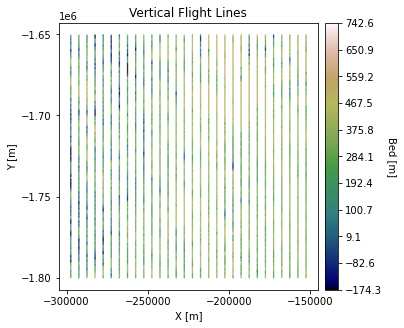

In [113]:
mu = np.mean(df_vert[z]); sd = np.std(df_vert[z])
sgs_plts.splot2D(df=df_vert, title='Vertical Flight Lines', x=x, y=y, c=z, vmin = mu - 3*sd, vmax = mu + 3*sd)

## Horizontal Path

In [114]:
df_horiz, _  = survey_path.horizontal(df_GT, rows, cols, 5, 10)

print(f'Number of Conditioning points: {len(df_horiz)}/{rows*cols}')

Number of Conditioning points: 9000/90000


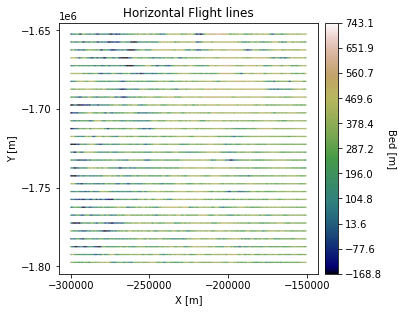

In [115]:
mu = np.mean(df_horiz[z]); sd = np.std(df_horiz[z])
sgs_plts.splot2D(df=df_horiz, title='Horizontal Flight lines', x=x, y=y, c=z, vmin = mu - 3*sd, vmax = mu + 3*sd)

In [116]:
double = pd.concat([df_orig_path, df_horiz], axis=0)
len(double[[x,y]]) - len(double[[x,y]].drop_duplicates())

764

## Grid Path

In [117]:
df_grid = survey_path.grid(df_GT, rows, cols, 5, 10)

print(f'Number of Conditioning points: {len(df_grid)}/{rows*cols}')

Number of Conditioning points: 9000/90000


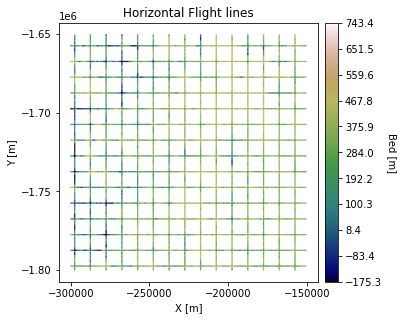

In [118]:
mu = np.mean(df_grid[z]); sd = np.std(df_grid[z])

sgs_plts.splot2D(df=df_grid, title='Horizontal Flight lines', x=x, y=y, c=z, vmin = mu - 3*sd, vmax = mu + 3*sd)

In [119]:
double = pd.concat([df_orig_path, df_grid], axis=0)
len(double[[x,y]]) - len(double[[x,y]].drop_duplicates())

873

## Diagonal Paths

In [120]:
df_posdiag = survey_path.diagonal(df_GT, rows, cols, x, y, z, 5, 10, pos=True)
print(f'Number of Conditioning points (Positive): {len(df_posdiag)}/{rows*cols}')

df_negdiag = survey_path.diagonal(df_GT, rows, cols, x, y, z, 5, 10, pos=False)
print(f'Number of Conditioning points (Negative): {len(df_negdiag)}/{rows*cols}')

df_griddiag = survey_path.grid_diag(df_GT, rows, cols, x, y, z, 5, 10)
print(f'Number of Conditioning points (Grid): {len(df_griddiag)}/{rows*cols}')

Number of Conditioning points (Positive): 9000/90000
Number of Conditioning points (Negative): 9000/90000
Number of Conditioning points (Grid): 9000/90000


In [121]:
double_pos = pd.concat([df_orig_path, df_posdiag], axis=0)
double_neg = pd.concat([df_orig_path, df_negdiag], axis=0)
double_grid = pd.concat([df_orig_path, df_griddiag], axis=0)
print("Pos. Diagonal # equal:", len(double_pos[[x,y]]) - len(double_pos[[x,y]].drop_duplicates()))
print("Neg. Diagonal # equal:", len(double_neg[[x,y]]) - len(double_neg[[x,y]].drop_duplicates()))
print("Grid Diagonal # equal:", len(double_grid[[x,y]]) - len(double_grid[[x,y]].drop_duplicates()))

Pos. Diagonal # equal: 784
Neg. Diagonal # equal: 771
Grid Diagonal # equal: 976


In [137]:
double_pos.loc[double_pos[[x,y]].duplicated(keep='first'), :]

,X,Y,Sum,Count,Bed,simulated,cluster
25,-287500.0,-1800000.0,NaN,NaN,358.317134,NaN,NaN
55,-272500.0,-1800000.0,NaN,NaN,180.123521,NaN,NaN
85,-257500.0,-1800000.0,NaN,NaN,325.385015,NaN,NaN
376,-262000.0,-1799500.0,NaN,NaN,302.254027,NaN,NaN
396,-252000.0,-1799500.0,NaN,NaN,309.288816,NaN,NaN
...,...,...,...,...,...,...,...
88991,-204500.0,-1652000.0,NaN,NaN,605.657303,NaN,NaN
89292,-204000.0,-1651500.0,NaN,NaN,507.057806,NaN,NaN
89413,-293500.0,-1651000.0,NaN,NaN,253.656236,NaN,NaN
89714,-293000.0,-1650500.0,NaN,NaN,342.286022,NaN,NaN


In [139]:
double_pos.loc[double_pos[[x,y]].duplicated(keep='last'), :]

,X,Y,Sum,Count,Bed,simulated,cluster
25,-287500.0,-1800000.0,2508.219971,7.0,358.317139,0.0,NaN
55,-272500.0,-1800000.0,6844.693848,38.0,180.123520,0.0,NaN
85,-257500.0,-1800000.0,3904.620117,12.0,325.385010,0.0,NaN
376,-262000.0,-1799500.0,44129.089844,146.0,302.254028,0.0,NaN
396,-252000.0,-1799500.0,21031.640625,68.0,309.288818,0.0,NaN
...,...,...,...,...,...,...,...
88991,-204500.0,-1652000.0,13324.450195,22.0,605.656799,0.0,NaN
89292,-204000.0,-1651500.0,4056.462402,8.0,507.057800,0.0,NaN
89413,-293500.0,-1651000.0,4819.468262,19.0,253.656235,0.0,NaN
89714,-293000.0,-1650500.0,1369.144043,4.0,342.286011,0.0,NaN


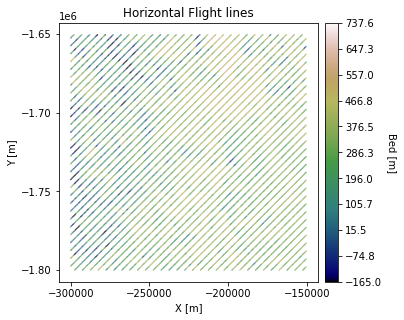

In [124]:
mu = np.mean(df_posdiag[z]); sd = np.std(df_posdiag[z])
sgs_plts.splot2D(df=df_posdiag, title='Horizontal Flight lines', x=x, y=y, c=z, vmin = mu - 3*sd, vmax = mu + 3*sd)

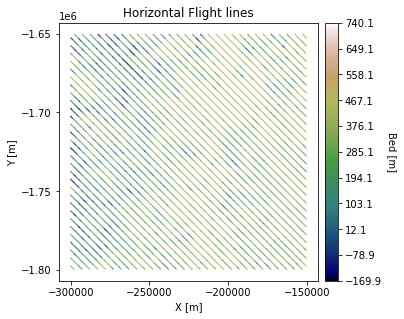

In [125]:
mu = np.mean(df_negdiag[z]); sd = np.std(df_negdiag[z])
sgs_plts.splot2D(df=df_negdiag, title='Horizontal Flight lines', x=x, y=y, c=z, vmin = mu - 3*sd, vmax = mu + 3*sd)

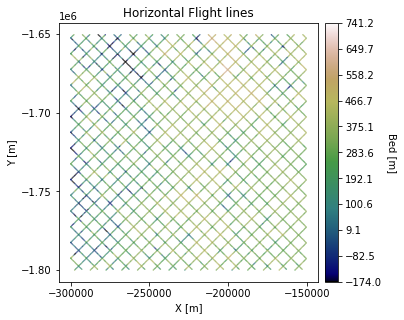

In [126]:
mu = np.mean(df_griddiag[z]); sd = np.std(df_griddiag[z])

sgs_plts.splot2D(df=df_griddiag, title='Horizontal Flight lines', x=x, y=y, c=z, vmin = mu - 3*sd, vmax = mu + 3*sd)

In [127]:
# Download all data
df_vert.to_csv("Data/Simulated/PIG_vert_2.csv")
df_horiz.to_csv("Data/Simulated/PIG_horiz_2.csv")
df_grid.to_csv("Data/Simulated/PIG_grid_2.csv")
df_posdiag.to_csv("Data/Simulated/PIG_posdiag_2.csv")
df_negdiag.to_csv("Data/Simulated/PIG_negdiag_2.csv")
df_griddiag.to_csv("Data/Simulated/PIG_griddiag_2.csv")